In [1]:
from importlib import reload
from my_functions import read_data
from my_functions import data_visualization as dv
from my_functions import my_svr

# Load elec and weather data

In [23]:
elec_data_path = './elec_data/hac.xlsx'
weather_data_path = './weather_data/weather_data_20170201-20170331.csv'

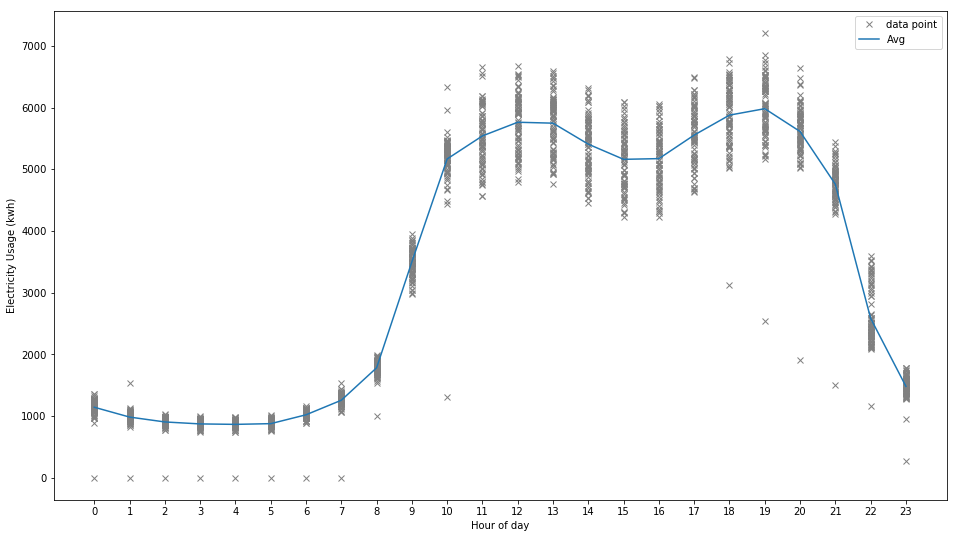

In [24]:
elec = read_data.elec(elec_data_path)
dv.plot_elec(elec)

In [25]:
weather = read_data.weather(weather_data_path)
elec_and_weather = read_data.elec_and_weather(elec, weather, startDate='2/1/2017', endDate='3/31/2017')

In [26]:
elec_and_weather.head()

,kwh,charge,p,pi,kwhi,q,qi,kvarhi,conds,hum,precipm,tempm,wspdm
2017-02-01 00:00:00,1107.75,779.19135,4431.0,NaN,1107.75,NaN,NaN,NaN,NaN,72.0,NaN,16.0,7.2
2017-02-01 01:00:00,925.50,650.99670,3702.0,NaN,925.50,NaN,NaN,NaN,NaN,72.0,NaN,16.0,7.2
2017-02-01 02:00:00,894.90,629.47266,3579.6,NaN,894.90,NaN,NaN,NaN,NaN,68.0,NaN,16.0,10.8
2017-02-01 03:00:00,850.80,598.45272,3403.2,NaN,850.80,NaN,NaN,NaN,NaN,72.0,NaN,16.0,7.2
2017-02-01 04:00:00,886.35,623.45859,3545.4,NaN,886.35,NaN,NaN,NaN,NaN,72.0,NaN,16.0,14.4


# Explore the data

## compare elec usage on weekday and weekends

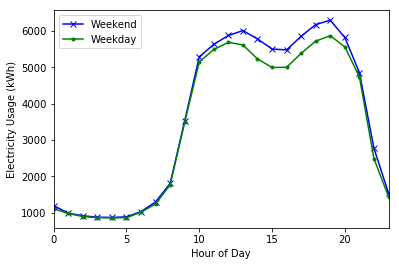

In [27]:
dv.compare_weekday_weekend(elec_and_weather)

## plot elec usage and temperature

                            OLS Regression Results                            
Dep. Variable:                    kwh   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     245.5
Date:                Mon, 17 Apr 2017   Prob (F-statistic):           4.19e-51
Time:                        16:31:11   Log-Likelihood:                -12623.
No. Observations:                1402   AIC:                         2.525e+04
Df Residuals:                    1400   BIC:                         2.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -784.1051    274.568     -2.856      0.0

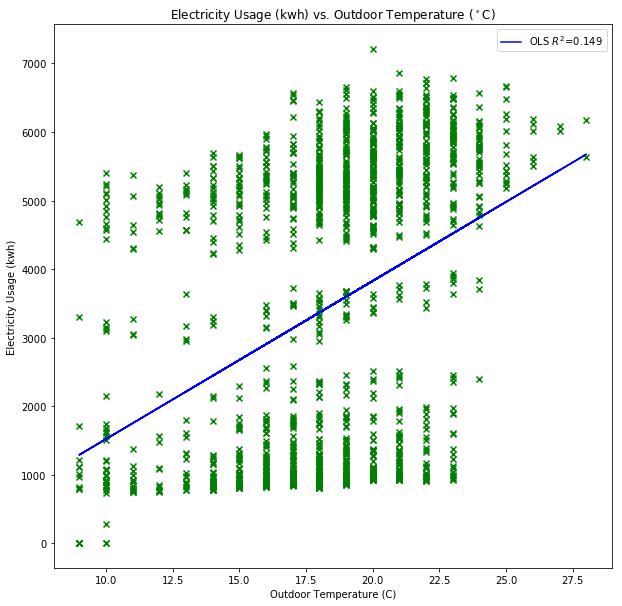

In [28]:
dv.compare_elec_temp(elec_and_weather)

## correlation between elec usage at t and t-k

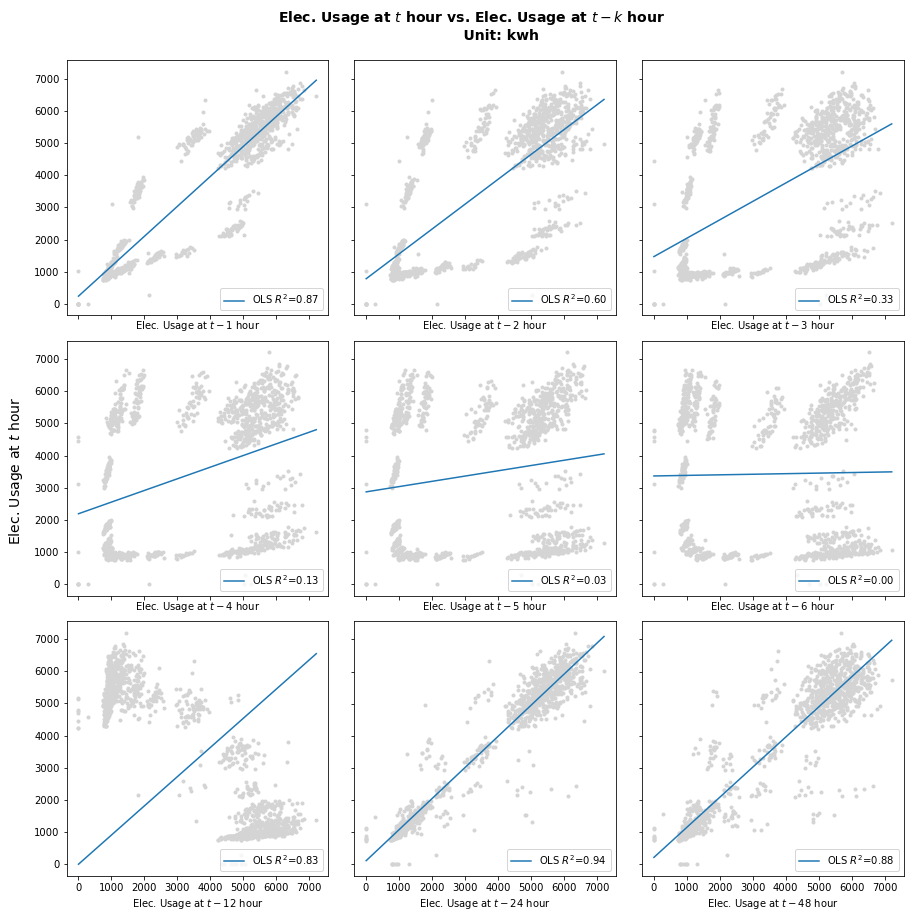

In [43]:
my_svr.add_historical_kwh(elec_and_weather)
dv.compare_t_t_k(elec_and_weather)